In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.init as init
import numpy as np
from tqdm import tqdm
import random
import pdb
%matplotlib inline

In [3]:
#random seed
random_seed = 0
torch.manual_seed(random_seed)  # torch
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)  # if use multi-GPU
np.random.seed(random_seed)  # numpy
random.seed(random_seed)  # random

In [4]:
def mse_loss(output, target):
    return torch.mean((output - target) ** 2)

#parameter
num_epochs = 100
num_iter = 100
num_extract = 50

# Define the input and target
x = torch.linspace(-2, 2, 100).view(-1,1)
target = 2 * x ** 3 - 4 * x ** 2 + 3 * x + torch.randn_like(x)
# target = 3 * x - 1 + torch.randn_like(x)

# Theta of Cycloid
theta_1 = torch.linspace(1 * np.pi, 2 * np.pi, num_epochs).view(-1,1)
theta_2 = torch.linspace(0, 1 * np.pi, num_epochs).view(-1,1)

# Train the model
mse_losses = []
mse_weights_list = []
# mse_bias_list = []
converged_epochs = []

In [5]:
for i in tqdm(range(num_iter)):
    # Define the model
    model = torch.nn.Linear(1, 1)
    model.bias.data.fill_(0)
    init.xavier_normal_(model.weight)
    # Define the optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    losses = []
    crr_weights_list = []
    crr_bias_list = []
    for epoch in range(num_epochs):
        # Zero the gradients
        optimizer.zero_grad()
        #weight 추적
        weights = model.weight.data
        bias = model.bias.data

        # Forward pass
        output = model(x)
        loss = mse_loss(output, target)

        # Backward pass
        loss.backward()
        crr_weights_list.append(weights.item())
        # crr_bias_list.append(bias.item())
        optimizer.step()

        # Store the loss
        losses.append(loss.item())

        # Check for convergence
        if len(converged_epochs) == i:
            if len(losses) > 1:
                gradient = losses[-1] - losses[-2] # 현재 epoch과 이전 epoch의 loss 값 차이
                if abs(gradient) < 0.07: # 기울기가 0에 가까워질 때마다 converged_epochs 리스트에 epoch 값을 추가
                    converged_epochs.append(epoch)
                if epoch == num_epochs - 1: # 한 epoch 끝까지 수렴 안 하면 마지막 값을 수렴점으로 지정
                    converged_epochs.append(epoch)

    # Store the losses11
    mse_losses.append(losses)
    mse_weights_list.append(crr_weights_list)
    # mse_bias_list.append(crr_bias_list)

100%|██████████| 100/100 [00:05<00:00, 16.98it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

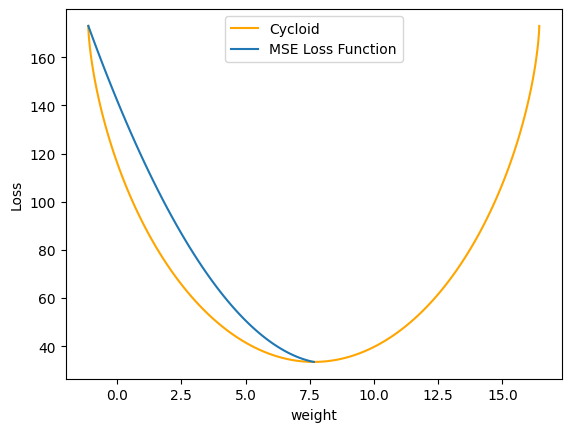


> /tmp/ipykernel_2962/1928344700.py(2)<cell line: 2>()
      1 gradients_list = []
----> 2 for i in tqdm(range(len(mse_weights_list))):
      3     # Cycloid 초기값
      4     r = abs(mse_losses[i][-1] - mse_losses[i][0])/2  # Cycloid 그래프의 높이 맞추기
      5     x_1 = r * (theta_1 - np.sin(theta_1))

array([8.67769635e+02, 8.77244649e+02, 8.92347954e+02, 9.03996751e+02,
       9.12506707e+02, 9.18258738e+02, 9.21552178e+02, 9.22702480e+02,
       9.21996765e+02, 9.19720156e+02, 9.16136405e+02, 9.11494246e+02,
       9.05989546e+02, 8.99831762e+02, 8.93229188e+02, 8.86321930e+02,
       8.79270410e+02, 8.72224191e+02, 8.65300975e+02, 8.58611187e+02,
       8.52257984e+02, 8.46337267e+02, 8.40927892e+02, 8.36106145e+02,
       8.31942663e+02, 8.28495250e+02, 8.25835741e+02, 8.24003712e+02,
       8.23049968e+02, 8.23041861e+02, 8.24002056e+02, 8.25993147e+02,
       8.29068333e+02, 8.33249036e+02, 8.38609970e+02, 8.45199300e+02,
       8.53055722e+02, 8.62228250e+02, 8.72792471e+02, 8.8483529

  0%|          | 0/100 [00:22<?, ?it/s]


In [7]:
gradients_list = []
for i in tqdm(range(len(mse_weights_list))):
    # Cycloid 초기값
    r = abs(mse_losses[i][-1] - mse_losses[i][0])/2  # Cycloid 그래프의 높이 맞추기
    x_1 = r * (theta_1 - np.sin(theta_1))
    x_2 = r * (theta_2 - np.sin(theta_2))
    cycloid_graph_1 = -r * (1 - np.cos(theta_1))
    cycloid_graph_2 = -r * (1 - np.cos(theta_2))

    #위치 조정
    x_1 = (x_1 / x_2[-1]) * (mse_weights_list[i][-1] - mse_weights_list[i][0]) + mse_weights_list[i][0] #x축 맞추기
    x_2 = (x_2 / x_2[-1]) * (mse_weights_list[i][-1] - mse_weights_list[i][0]) + mse_weights_list[i][0]
    cycloid_graph_1_1 = cycloid_graph_1 + mse_losses[i][0] #y축 왼쪽 시작점 맞추기
    cycloid_graph_2_1 = cycloid_graph_2 + mse_losses[i][0]

    #Gradient
    cycl_graph_gradients_1 = np.gradient(cycloid_graph_1_1.flatten(), x_1.flatten(), axis=0)
    cycl_graph_gradients_2 = np.gradient(cycloid_graph_2_1.flatten(), x_2.flatten(), axis=0)
    mse_weight_gradients = np.gradient(mse_losses[i], mse_weights_list[i], axis=0) #i번째 Loss 함수의 gradient

    #Gradient 차이 계산
    gradients_diff_1 = abs(mse_weight_gradients - cycl_graph_gradients_1)**2
    gradients_diff_2 = abs(mse_weight_gradients - cycl_graph_gradients_2)**2
    gradients_diff_mean_1 = np.mean(gradients_diff_1)
    gradients_diff_mean_2 = np.mean(gradients_diff_2)
    if np.mean(gradients_diff_mean_1) >= np.mean(gradients_diff_mean_2):
        gradients_diff_mean = gradients_diff_mean_2
    else:
        gradients_diff_mean = gradients_diff_mean_1
    gradients_list.append(gradients_diff_mean)

    #compare gradient graph
    plt.plot(x_1, cycloid_graph_1_1, label="Cycloid", color="Orange")
    plt.plot(x_2, cycloid_graph_2_1, color="Orange")
    plt.plot(mse_weights_list[i], mse_losses[i], label="MSE Loss Function")
    plt.xlabel("weight")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    # plt.savefig('fig1.png')
    print()
    pdb.set_trace()

In [ ]:
min_idx = np.argmin(gradients_list)
mse_losses_mean_min = mse_losses[min_idx]
mse_losses_mean = np.mean(mse_losses, axis=0)

min_idx_10 = np.argsort(gradients_list)[:num_extract] #상위 n개 추출하여 비교

sorted_indices = sorted(range(len(mse_losses)), key=lambda i: mse_losses[i][0]) # 0번째 원소를 기준으로 리스트를 정렬한 후 인덱스를 정렬
init_loss_min_idx_10 = sorted_indices[:num_extract]  # 상위 n개 인덱스 추출

converged_10_list = []
for i in range(len(min_idx_10)):
    converged_10_list.append(converged_epochs[min_idx_10[i]])

init_converged_10_list = []
for i in range(len(init_loss_min_idx_10)):
    init_converged_10_list.append(converged_epochs[init_loss_min_idx_10[i]])

#when converge
# print("Top Cycloid Loss function Converge at: ", converged_epochs[min_idx])
print("Top 5% Cycloid Loss function Converge Mean at: ", np.mean(converged_10_list))
print("Top 5% low initial loss Mean: ", np.mean(init_converged_10_list))
print("Converge Mean: ", np.mean(converged_epochs))
print("Top 5% Cycloid Loss Varience: ", np.var(converged_10_list))
print("Top 5% low initial Loss Varience: ", np.var(init_converged_10_list))
print("MSE Loss Varience: ", np.var(converged_epochs))

# Plot the losses

# plt.plot(mse_losses_mean_min, label="Cycloid Loss")
plt.plot(mse_losses[0], label='All of MSE', color='tab:gray')
plt.plot(mse_losses[min_idx_10[0]], label='Top 5% MSE Similar to Cycloid', color='tab:cyan')
for i in range(len(mse_losses)):
    plt.plot(mse_losses[i], color='tab:gray')

for i in range(len(converged_10_list)):
    plt.plot(mse_losses[min_idx_10[i]], color='tab:cyan')

for i in range(len(init_converged_10_list)):
    plt.plot(mse_losses[init_loss_min_idx_10[i]], color='tab:orange')

plt.plot(mse_losses_mean, label="Mean of MSE", color='red')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("cycloid.png")
# plt.show()